#### Intern: Anjali Bathla
Task 4

Task: To find the hot zone of terrorism, security issues, and insights

---

### 1) Importing Data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#importing dataset
df=pd.read_csv('GlobalTerrorism.csv', engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


---

### 2.) Exploring Data

In [3]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
#checking for null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

- It seems some columns have too many missing values. 

---

In [5]:
#Selecting features with columns which don't have null values more than 80% of the dataset(rows)
features=df.columns[df.isnull().mean() < 0.8]

In [6]:
#length of selected features
len(features)

67

In [7]:
#displaying those features
features

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

- We don't need all the remaining features. So. we will manually select the features

In [8]:
features_manual =['eventid', 'iyear', 'imonth', 'iday', 
       'country_txt', 'region_txt','city', 'success', 'suicide',
       'attacktype1_txt','targtype1_txt', 'target1', 'gname', 'nkill', 'nwound',
       'weaptype1_txt']
data = df[features_manual]
data.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,target1,gname,nkill,nwound,weaptype1_txt
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,1.0,0.0,Unknown
1,197000000002,1970,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0,Unknown
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Employee,Unknown,1.0,0.0,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,NaN,NaN,Explosives
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,NaN,NaN,Incendiary


In [9]:
#checking for null values again
data.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
city                 434
success                0
suicide                0
attacktype1_txt        0
targtype1_txt          0
target1              636
gname                  0
nkill              10313
nwound             16311
weaptype1_txt          0
dtype: int64

In [10]:
#dropping null values in rows
data=data.dropna(axis=0)
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
city               0
success            0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
gname              0
nkill              0
nwound             0
weaptype1_txt      0
dtype: int64

In [11]:
#renaming columns
data.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt':'country','attacktype1_txt':'attacktype','nwound':'wound','nkill':'killed',
                  'region_txt':'region', 'targtype1_txt':'target', 'gname':'group', 'nkill':'killed', 'nwound':'wounded', 'weaptype1_txt':'weapon'}, inplace=True)
data.head()

,eventid,year,month,day,country,region,city,success,suicide,attacktype,target,target1,group,killed,wounded,weapon
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,1.0,0.0,Unknown
1,197000000002,1970,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,0.0,0.0,Unknown
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Employee,Unknown,1.0,0.0,Unknown
5,197001010002,1970,1,1,United States,North America,Cairo,1,0,Armed Assault,Police,Cairo Police Headquarters,Black Nationalists,0.0,0.0,Firearms
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,0,0,Assassination,Police,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),0.0,0.0,Firearms


In [12]:
#data description
data.describe()

,eventid,year,month,day,success,suicide,killed,wounded
count,1.638050e+05,163805.000000,163805.000000,163805.000000,163805.000000,163805.000000,163805.000000,163805.000000
mean,2.003285e+11,2003.218376,6.486286,15.518635,0.882177,0.037294,2.131748,3.169287
std,1.277076e+09,12.770788,3.386983,8.806528,0.322399,0.189483,9.827702,36.102358
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991112e+11,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000
50%,2.009071e+11,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,1.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,1384.000000,8191.000000


- The success rate of terrorist attack is nearly 88.9%

---

### 3.) No. of Terrorist attacks Country-wise

In [13]:
#no. of attacks in descending order country-wise
data.groupby('country').count()[['eventid']].sort_values('eventid',ascending=False)

,eventid
country,
Iraq,23249
Pakistan,13843
Afghanistan,11799
India,11448
Colombia,7683
...,...
Wallis and Futuna,1
South Vietnam,1
North Korea,1


- Iraq faced highest numbers of terrorist attacks.(24,578 attacks)
- Pakistan and Afghanistan also has quite a number of terrorist attacks.

---

### 3.) No. of Terrorist attacks Region-wise

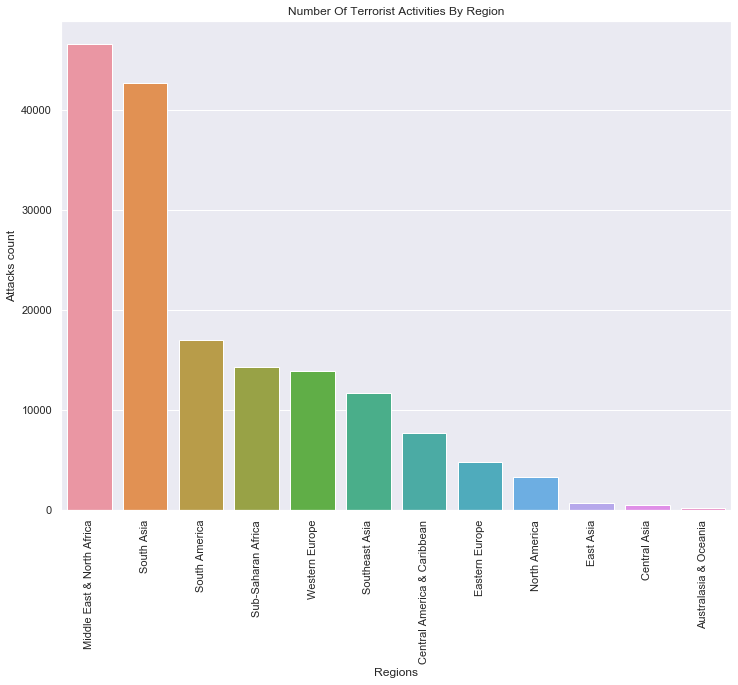

In [14]:
#plotting countplot for terrorist attacks regionwise
plt.subplots(figsize=(12,9))
sns.countplot('region',data=data,order=data['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel("Attacks count")
plt.title('Number Of Terrorist Activities By Region')
plt.show()


- Middle East & North Africa faced highest numbers of terrorist attacks.(near 50,000 attacks)
- South Asia also has quite a number of terrorist attacks

---

### 4.) No. of Terrorist attacks City-wise

In [15]:
#no. of attacks in descending order city-wise
data.groupby('city').count()[['eventid']].sort_values('eventid',ascending=False).head(15)

,eventid
city,
Unknown,8636
Baghdad,7352
Karachi,2565
Mosul,2111
Lima,2108
Mogadishu,1374
Santiago,1352
Belfast,1322
San Salvador,1239


In [16]:
#checking the region and country of the city with highest terrorist attacks
data[data['city']=='Baghdad'][['city','region','country']][:1]

,city,region,country
4385,Baghdad,Middle East & North Africa,Iraq


- Baghdad has faced most of the terrorist attacks. It falls in Middle East and North Africa region which again is the region with most terrorist attacks according to the data given.
- It is in Iraq, which can be seen with max, i.e, 24,578 terrorist attacks.

---

### 5.) Targets of Terrorists

In [17]:
data['target'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Transportation', 'NGO',
       'Telecommunication', 'Terrorists/Non-State Militia',
       'Food or Water Supply', 'Tourists', 'Maritime', 'Other', 'Unknown',
       'Abortion Related'], dtype=object)

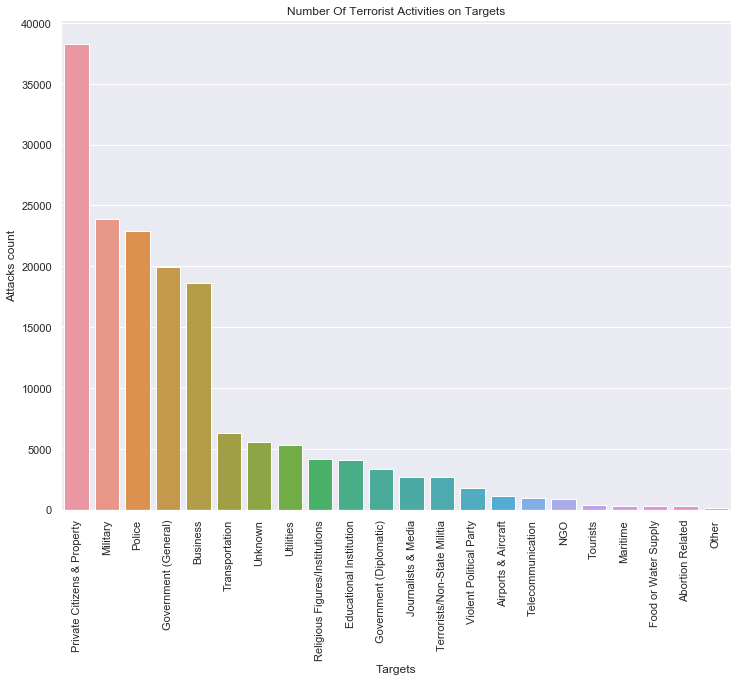

In [18]:
#plotting countplot for terrorist attacks based on the target
plt.subplots(figsize=(12,9))
sns.countplot('target',data=data,order=data['target'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Targets')
plt.ylabel("Attacks count")
plt.title('Number Of Terrorist Activities on Targets')
plt.show()

- Private Citizens and properties are attacked the most, followed by Military and Police

In [19]:
#checking targets in detail
data['target1'].nunique()

78529

- There are too many sub-targets, so we will not consider it.

---

### Success and Failures

In [20]:
#Checking total number of successes and failures
success_count=data['success'].value_counts()
success_count

1    144505
0     19300
Name: success, dtype: int64

([<matplotlib.patches.Wedge at 0x15464648348>,
 [Text(-1.0254996515596877, 0.3979327388528863, 'Success'),
  Text(1.0254996701882624, -0.3979326908457831, 'Failure')],
 [Text(-0.5593634463052841, 0.21705422119248344, '88.2%'),
  Text(0.5593634564663248, -0.21705419500679074, '11.8%')])

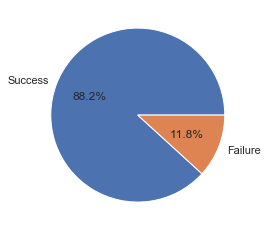

In [21]:
#plotting pie chart for succeses and failures
labels='Success', 'Failure'
plt.pie(success_count,labels= labels, autopct='%1.1f%%')

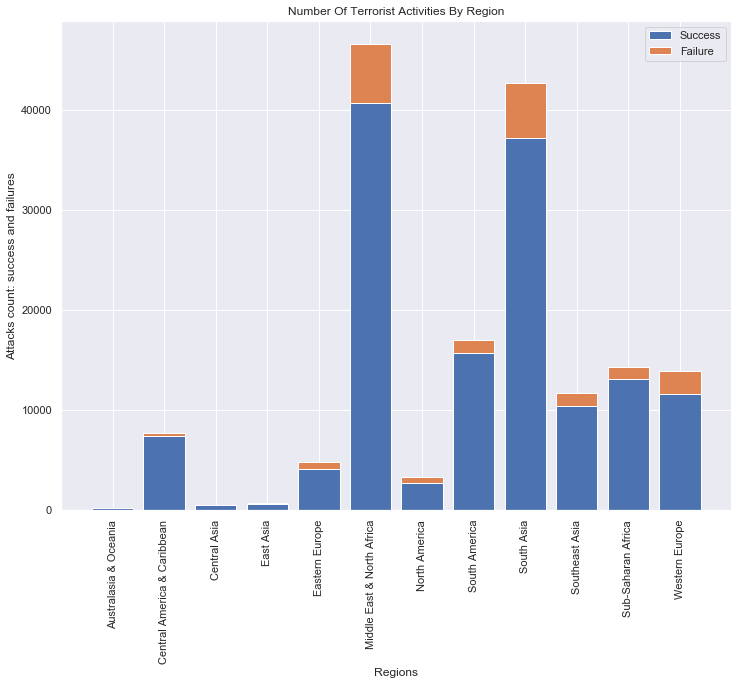

In [22]:
#plotting countplot for terrorist attacks regionwise
plt.subplots(figsize=(12,9))
p1= plt.bar(list(data.groupby('region').count()['eventid'].index),  list(data[data['success']==1].groupby('region').count()['eventid']))
p2= plt.bar(list(data.groupby('region').count()['eventid'].index),  list(data[data['success']==0].groupby('region').count()['eventid']), 
        bottom= list(data[data['success']==1].groupby('region').count()['eventid']))
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel("Attacks count: success and failures")
plt.title('Number Of Terrorist Activities By Region')
plt.legend((p1[0], p2[0]), ('Success', 'Failure'))
plt.show()


- The attack being failure is only high for regions where attacks are more frequent. 
- Attacks being a failure do not depend on the region.
- Percentage of attacks being faiure is 11.1% only

---

### 6.) Attack-type and weapons used

In [23]:
#number of unique attack types
data['attacktype'].nunique()

9

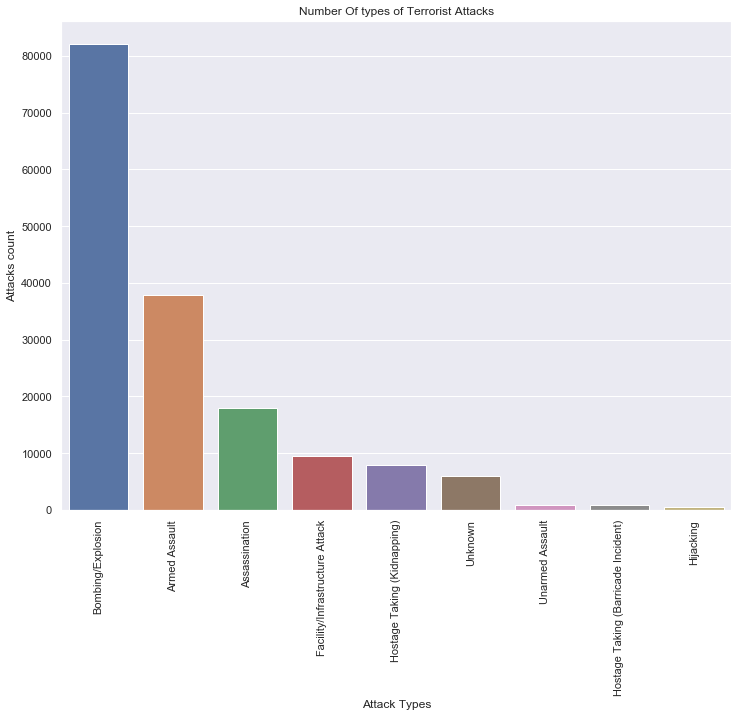

In [24]:
#plotting countplot for terrorist attacks types
plt.subplots(figsize=(12,9))
sns.countplot('attacktype',data=data,order=data['attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Types')
plt.ylabel("Attacks count")
plt.title('Number Of types of Terrorist Attacks')
plt.show()

In [25]:
#No. of unique weapons used by terrorists
data['weapon'].nunique()

12

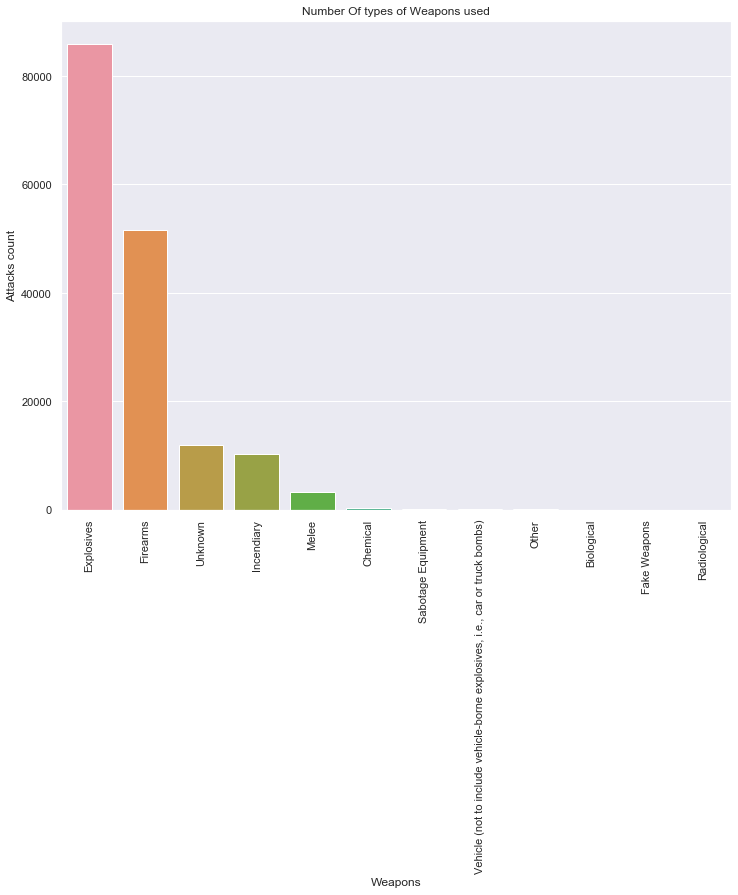

In [26]:
#plotting countplot for weapons used
plt.subplots(figsize=(12,9))
sns.countplot('weapon',data=data,order=data['weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapons')
plt.ylabel("Attacks count")
plt.title('Number Of types of Weapons used')
plt.show()

- Explosives or bombs are used the most by terrorists.
- Armed Assaults(using firearms) are also done by terrorists in a large number.

___

### 7.) People wounded in attacks region-wise

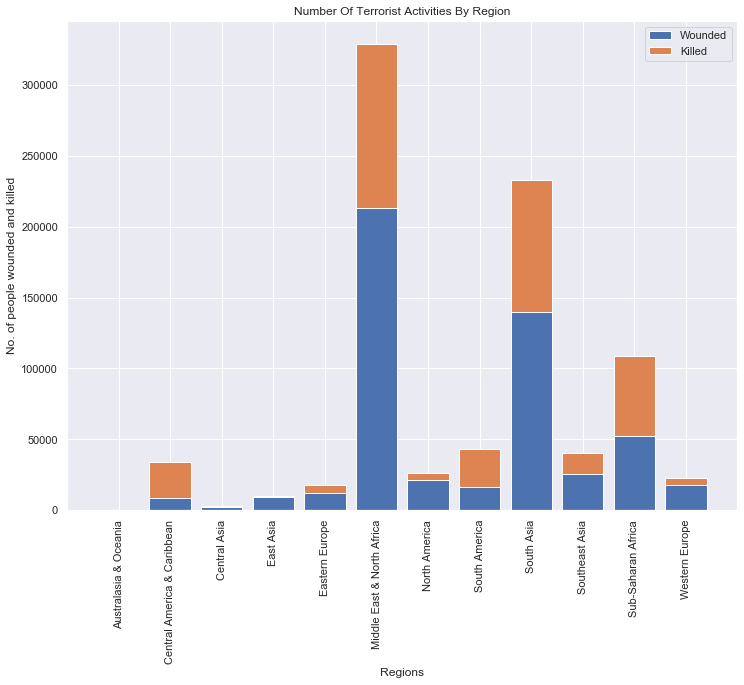

In [27]:
#plotting countplot for no.of wounded people and people killed regionwise
plt.subplots(figsize=(12,9))
p1= plt.bar(list(data.groupby('region').count()['eventid'].index),  list(data.groupby('region').sum()['wounded']))
p2= plt.bar(list(data.groupby('region').count()['eventid'].index),  list(data.groupby('region').sum()['killed']), 
        bottom= list(data.groupby('region').sum()['wounded']))
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel("No. of people wounded and killed")
plt.title('Number Of Terrorist Activities By Region')
plt.legend((p1[0], p2[0]), ('Wounded', 'Killed'))
plt.show()


- Middle East and North Africa and South Asia have so many people dead and injured in the terrorist attacks. These areas also faced more numbers of terrorists attacks.
- Middle East and North Africa are clearly the hot zones.
- Looking at *Sub-Saharan Africa* and *Central America and Caribbean* , these areas haveless no. of attacks as compared to the ones mentioned above but they have less percentage of attacks being failure, and they also have more people killed than the ones who were wounded.
##### They might become hot zones of terrorisms in future.

---

#### Checking no. of attacks in *Sub-Saharan Africa* and *Central America and Caribbean* region year wise


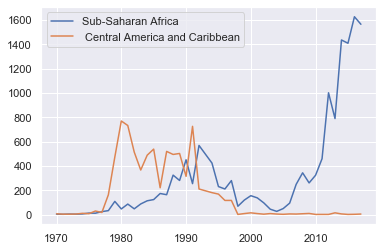

In [28]:
#Plotting line graphs
plt.plot(data[data['region']=='Sub-Saharan Africa'].groupby('year').count().index,
         data[data['region']=='Sub-Saharan Africa'].groupby('year').count()['eventid'], label='Sub-Saharan Africa')
plt.plot(data[data['region']=='Central America & Caribbean'].groupby('year').count().index,
         data[data['region']=='Central America & Caribbean'].groupby('year').count()['eventid'], 
         label=' Central America and Caribbean')
plt.legend()
plt.show()

- The graph of Sub-Saharan Africa seems to be going up. So, it is also the hot zone of terrorism.

---

#### Checking South Asia, and Middle East & North Africa with time

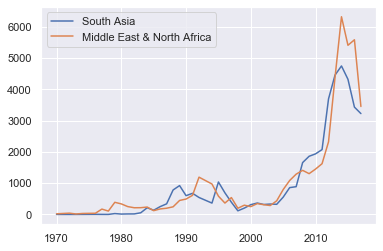

In [29]:
#Plotting line graphs
plt.plot(data[data['region']=='South Asia'].groupby('year').count().index,
         data[data['region']=='South Asia'].groupby('year').count()['eventid'], label='South Asia')
plt.plot(data[data['region']=='Middle East & North Africa'].groupby('year').count().index,
         data[data['region']=='Middle East & North Africa'].groupby('year').count()['eventid'], 
         label='Middle East & North Africa')
plt.legend()
plt.show()

### Summary:

- These three are the hot zones of terrorism:
    * Middle East & North Africa
    * South Asia
    * Sub-Saharan Africa (it might become a hot zone in future. It also has very low failure percentage.)
    
- Security issues:
    * Terrorists are able to penetrate through the securities in any region with explosives or firearms.
    * Securities should be tightened in hot zones and more security checks should be done.
    
- Insights:
    * Percentage of attacks being faiure is 11.1% only.
    * Baghdad has faced most of the terrorist attacks. It falls in Middle East and North Africa region which again is the region with most terrorist attacks according to the data given.
    * Baghdad is in Iraq, which has max, i.e, 24,578 terrorist attacks.